# Load Data

In [1]:
import os
import glob
import numpy as np
import pandas as pd

# Carpeta raíz que contiene las carpetas con los archivos .npy
carpeta_raiz = 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento/12162324/sc neurons 2p/'

# Patrón para buscar los archivos .npy en todas las subcarpetas
patron = '**/*.npy'

# Obtener la lista de archivos .npy que coinciden con el patrón
archivos = glob.glob(os.path.join(carpeta_raiz, patron), recursive=True)

# Diccionario para almacenar los DataFrames acumulados por nombre de archivo
dataframes = {}

# Iterar sobre los archivos y acumular los datos en el diccionario
for archivo in archivos:
    nombre = os.path.splitext(os.path.basename(archivo))[0]  # Obtener el nombre del archivo sin la extensión
    #print(nombre)
    
    # Obtener el nombre de las 3 últimas carpetas
    carpetas = os.path.dirname(archivo).split(os.sep)[-3:]
    folder_name = '-'.join(carpetas)
    
    # Cargar el archivo NPY
    data = np.load(archivo)
    
    # Aplanar los datos a una matriz bidimensional
    data_flattened = data.reshape(data.shape[0], -1)
    data_flattened=pd.DataFrame(data_flattened)
    data_flattened['folder_name'] = folder_name
    
    if nombre == '_ss_2pCalcium.dff':
        #print('Realizando transformación...')
        data_flattened = data_flattened.drop('folder_name', axis=1)

        # Utiliza la función melt para convertir las columnas en filas
        data_flattened = pd.melt(data_flattened, var_name='nROIs', value_name='dff')
        # Agregar un contador desde 0 hasta 42874 para cada ID
        data_flattened['nROW'] = data_flattened.groupby('nROIs').cumcount()
        # Agregar columna con el nombre de las 3 últimas carpetas
        data_flattened['folder_name'] = folder_name
        # Mostrar las primeras filas del DataFrame resultante
       # print(melted_df.head())
        # Guardar el DataFrame transformado en el diccionario
        #dataframes[nombre] = melted_df
        
    if nombre == '_ss_2pCalcium.timestamps':
        data_flattened =  data_flattened.rename(columns={0: 'timestamps'})
        data_flattened['folder_name'] = folder_name
    #else:
    #    # Aplanar los datos a una matriz bidimensional
    #    data_flattened = data.reshape(data.shape[0], -1)
    #    data_flattened=pd.DataFrame(data_flattened)
     #   data_flattened['folder_name'] = folder_name

    if nombre == '_ss_grating.intervals':
        data_flattened =  data_flattened.rename(columns={0: 'start', 1: 'end'})
        data_flattened['folder_name'] = folder_name
        #data_flattened['interval_ID'] = range(1, len(data_flattened) + 1)
        
        #dataframes['_ss_grating.intervals']['interval_ID'] = range(1, len(dataframes['_ss_grating.intervals']) + 1)
         #dataframes['_ss_grating.intervals'].rename(columns={0: 'start', 1: 'end'})
            
    if nombre == '_ss_grating._ss_gratingID' :
        data_flattened =  data_flattened.rename(columns={0: 'gratingID'})
        data_flattened['folder_name'] = folder_name
        #dataframes['_ss_grating._ss_gratingID'] =  dataframes['_ss_grating._ss_gratingID'].rename(columns={0: 'gratingID'})
    
  
    if nombre in dataframes:
        #print('nombre ya existe')
        # Si el nombre de archivo ya existe en el diccionario, acumula los datos
        dataframes[nombre] = pd.concat([dataframes[nombre], data_flattened], ignore_index=True)
        #dataframes[nombre]['folder_name'] = folder_name
    else:
        #print('nombre no existe')
        # Si el nombre de archivo no existe en el diccionario, crea un nuevo DataFrame
        dataframes[nombre] = data_flattened
        #Agregar columna con el nombre de las 3 últimas carpetas
        #dataframes[nombre]['folder_name'] = folder_name
    #print("---------------------")

## _ss_2pCalcium.dff

[delta-F-over-F] (nSamples, nROIs) Calcium traces of all ROIs 
for all experiments (stimulus presentations) performed during 
one imaging session


In [2]:
dataframes['_ss_2pCalcium.dff']

,nROIs,dff,nROW,folder_name
0,0,0.292567,0,SS038-2015-02-17-001
1,0,0.122752,1,SS038-2015-02-17-001
2,0,0.084692,2,SS038-2015-02-17-001
3,0,-0.016801,3,SS038-2015-02-17-001
4,0,0.035751,4,SS038-2015-02-17-001
...,...,...,...,...
84972262,291,0.433730,16287,SS048-2015-12-02-001
84972263,291,0.411959,16288,SS048-2015-12-02-001
84972264,291,0.245105,16289,SS048-2015-12-02-001
84972265,291,-0.087540,16290,SS048-2015-12-02-001


# _ss_2pCalcium.timestamps 

[s] (nSamples) Time stamps for calcium traces; NOTE: given 
times are for plane, add _ss_2pPlanes.delay for ROIs belonging 
to other imaging planes (specified in _ss_2pRois._ss_2pplanes)

In [3]:
#dataframes['_ss_2pCalcium.timestamps']  =  dataframes['_ss_2pCalcium.timestamps'].rename(columns={0: 'timestamps'})


In [4]:
dataframes['_ss_2pCalcium.timestamps'] 

,timestamps,folder_name
0,1.528,SS038-2015-02-17-001
1,1.594,SS038-2015-02-17-001
2,1.659,SS038-2015-02-17-001
3,1.725,SS038-2015-02-17-001
4,1.791,SS038-2015-02-17-001
...,...,...
236880,3377.112,SS048-2015-12-02-001
236881,3377.246,SS048-2015-12-02-001
236882,3377.379,SS048-2015-12-02-001
236883,3377.513,SS048-2015-12-02-001


# Calcium traces & neuron properties


## _ss_2pRois._ss_2pplanes 

[integer] (nROIs) Imaging plane of each ROI


In [5]:
dataframes['_ss_2pRois._ss_2pPlanes']

,0,folder_name
0,1.0,SS038-2015-02-17-001
1,1.0,SS038-2015-02-17-001
2,1.0,SS038-2015-02-17-001
3,1.0,SS038-2015-02-17-001
4,1.0,SS038-2015-02-17-001
...,...,...
3724,3.0,SS048-2015-12-02-001
3725,3.0,SS048-2015-12-02-001
3726,3.0,SS048-2015-12-02-001
3727,3.0,SS048-2015-12-02-001


## _ss_2pRois.ids [integer]

(nROIs) ID of each ROI (only relevant to match to raw 
data)


In [6]:
dataframes['_ss_2pRois.ids']

,0,folder_name
0,1.0,SS038-2015-02-17-001
1,2.0,SS038-2015-02-17-001
2,3.0,SS038-2015-02-17-001
3,4.0,SS038-2015-02-17-001
4,5.0,SS038-2015-02-17-001
...,...,...
3724,63.0,SS048-2015-12-02-001
3725,64.0,SS048-2015-12-02-001
3726,65.0,SS048-2015-12-02-001
3727,66.0,SS048-2015-12-02-001


## _ss_2pRois.xyz 

[double] (nROIs, 3) 3D position of ROIs in imaging volume

In [7]:
dataframes['_ss_2pRois.xyz']

,0,1,2,folder_name
0,237.165868,167.209571,0.000000,SS038-2015-02-17-001
1,235.024239,146.471371,0.000000,SS038-2015-02-17-001
2,222.705793,149.269314,0.000000,SS038-2015-02-17-001
3,15.566050,177.891640,0.000000,SS038-2015-02-17-001
4,23.756902,26.049703,0.000000,SS038-2015-02-17-001
...,...,...,...,...
3724,38.977931,591.124114,-81.037536,SS048-2015-12-02-001
3725,305.521371,416.927950,-73.633305,SS048-2015-12-02-001
3726,318.183993,361.902539,-71.377522,SS048-2015-12-02-001
3727,165.477969,555.270923,-79.483725,SS048-2015-12-02-001


## _ss_2pRois.isGad 

[integer] (nROIs) 1 if ROI is GAD+, -1 if ROI GAD-, NaN if not 
known

In [8]:
dataframes['_ss_2pRois.isGad']

,0,folder_name
0,0.0,SS038-2015-02-17-001
1,-1.0,SS038-2015-02-17-001
2,0.0,SS038-2015-02-17-001
3,-1.0,SS038-2015-02-17-001
4,1.0,SS038-2015-02-17-001
...,...,...
3724,0.0,SS048-2015-12-02-001
3725,-1.0,SS048-2015-12-02-001
3726,0.0,SS048-2015-12-02-001
3727,0.0,SS048-2015-12-02-001


## _ss_2pPlanes.delay 

[s] (nPlanes) Temporal delay for each plane relative to plane 1


In [9]:
dataframes['_ss_2pPlanes.delay']

,0,folder_name,1,2,3
0,0.0,SS038-2015-02-17-001,NaN,NaN,NaN
1,0.0,SS041-2015-04-23-001,0.03340,0.0668,0.1002
2,0.0,SS044-2015-04-28-001,0.03340,0.0668,0.1002
3,0.0,SS044-2015-05-29-001,0.03325,0.0665,NaN
4,0.0,SS045-2015-05-04-001,0.03325,0.0665,NaN
5,0.0,SS045-2015-05-05-001,0.03325,0.0665,NaN
6,0.0,SS047-2015-11-23-001,0.03325,0.0665,NaN
7,0.0,SS047-2015-12-03-001,0.03325,0.0665,NaN
8,0.0,SS048-2015-11-09-001,0.03325,0.0665,NaN
9,0.0,SS048-2015-12-02-001,0.03325,0.0665,NaN


# Behaviour

## _ss_running.speed 

[double] (nSamples) Trace of running speed of animal


In [10]:
dataframes['_ss_running.speed']

,0,folder_name
0,0.000000,SS038-2015-02-17-001
1,0.000000,SS038-2015-02-17-001
2,0.000000,SS038-2015-02-17-001
3,0.000000,SS038-2015-02-17-001
4,0.000000,SS038-2015-02-17-001
...,...,...
1942576,7.839430,SS048-2015-12-02-001
1942577,7.745542,SS048-2015-12-02-001
1942578,6.625528,SS048-2015-12-02-001
1942579,6.256048,SS048-2015-12-02-001


## _ss_running.timestamps

[s] (nSamples) Time stamps of running trace


In [11]:
dataframes['_ss_running.timestamps']

,0,folder_name
0,1.044488,SS038-2015-02-17-001
1,1.061528,SS038-2015-02-17-001
2,1.062004,SS038-2015-02-17-001
3,1.062415,SS038-2015-02-17-001
4,1.062820,SS038-2015-02-17-001
...,...,...
1942576,3377.546134,SS048-2015-12-02-001
1942577,3377.561182,SS048-2015-12-02-001
1942578,3377.576577,SS048-2015-12-02-001
1942579,3377.600733,SS048-2015-12-02-001


## eye.diameter 
[arb. Units] (nFrames) Pupil size


In [12]:
dataframes['eye.diameter']

,0,folder_name
0,39.750337,SS038-2015-02-17-001
1,39.871009,SS038-2015-02-17-001
2,39.880679,SS038-2015-02-17-001
3,39.871009,SS038-2015-02-17-001
4,39.750337,SS038-2015-02-17-001
...,...,...
911780,53.954324,SS048-2015-12-02-001
911781,53.954324,SS048-2015-12-02-001
911782,53.954324,SS048-2015-12-02-001
911783,53.954324,SS048-2015-12-02-001


## eye.xyPos 
[arb. units] (nFrames) Center position of pupil

In [13]:
dataframes['eye.xyPos']

,0,1,folder_name
0,172.380362,101.633877,SS038-2015-02-17-001
1,172.233056,101.464817,SS038-2015-02-17-001
2,172.268508,101.312497,SS038-2015-02-17-001
3,172.276600,101.354285,SS038-2015-02-17-001
4,172.231221,101.473699,SS038-2015-02-17-001
...,...,...,...
911780,204.584925,172.532197,SS048-2015-12-02-001
911781,205.270289,171.970724,SS048-2015-12-02-001
911782,205.135173,171.643064,SS048-2015-12-02-001
911783,205.179532,171.441288,SS048-2015-12-02-001


## eye.timestamps 
[s] (nFrames) Time stamps for pupil size and position

In [14]:
dataframes['eye.timestamps']

,0,folder_name
0,-1.665115,SS038-2015-02-17-001
1,-1.632019,SS038-2015-02-17-001
2,-1.598694,SS038-2015-02-17-001
3,-1.565300,SS038-2015-02-17-001
4,-1.532043,SS038-2015-02-17-001
...,...,...
911780,3382.526117,SS048-2015-12-02-001
911781,3382.559450,SS048-2015-12-02-001
911782,3382.592821,SS048-2015-12-02-001
911783,3382.625925,SS048-2015-12-02-001


# Stimuli

## _ss_grating.intervals 
[s] (nTrials,2) On- and offset times of gratings


In [15]:
#dataframes['_ss_grating.intervals'] =  dataframes['_ss_grating.intervals'].rename(columns={0: 'start', 1: 'end'})


In [16]:
dataframes['_ss_grating.intervals']

,start,end,folder_name
0,57.561,59.575,SS038-2015-02-17-001
1,64.595,66.609,SS038-2015-02-17-001
2,72.762,74.775,SS038-2015-02-17-001
3,80.695,82.709,SS038-2015-02-17-001
4,88.162,90.176,SS038-2015-02-17-001
...,...,...,...
1815,1174.135,1176.149,SS048-2015-12-02-001
1816,1181.202,1183.216,SS048-2015-12-02-001
1817,1187.785,1189.799,SS048-2015-12-02-001
1818,1193.585,1195.599,SS048-2015-12-02-001


## _ss_grating._ss_gratingID 
[integer] (nTrials) ID of grating in each trial


In [17]:
#dataframes['_ss_grating._ss_gratingID'] =  dataframes['_ss_grating._ss_gratingID'].rename(columns={0: 'gratingID'})


In [18]:
dataframes['_ss_grating._ss_gratingID']

,gratingID,folder_name
0,1.0,SS038-2015-02-17-001
1,11.0,SS038-2015-02-17-001
2,6.0,SS038-2015-02-17-001
3,2.0,SS038-2015-02-17-001
4,12.0,SS038-2015-02-17-001
...,...,...
1815,3.0,SS048-2015-12-02-001
1816,1.0,SS048-2015-12-02-001
1817,10.0,SS048-2015-12-02-001
1818,7.0,SS048-2015-12-02-001


In [19]:
# Obtener los valores únicos de la columna
valores_unicos = dataframes['_ss_grating._ss_gratingID']['gratingID'].unique()

valores_unicos

array([ 1., 11.,  6.,  2., 12.,  9.,  3., 10., 13.,  8.,  4.,  5.,  7.])

## _ss_gratingID.directions 
[angles] (nGratings) Direction of movement of grating; NaN if 
blank was shown

In [20]:
dataframes['_ss_gratingID.directions'][dataframes['_ss_gratingID.directions']['folder_name']=='SS038-2015-02-17-001']

,0,folder_name
0,0.0,SS038-2015-02-17-001
1,30.0,SS038-2015-02-17-001
2,60.0,SS038-2015-02-17-001
3,90.0,SS038-2015-02-17-001
4,120.0,SS038-2015-02-17-001
5,150.0,SS038-2015-02-17-001
6,180.0,SS038-2015-02-17-001
7,210.0,SS038-2015-02-17-001
8,240.0,SS038-2015-02-17-001
9,270.0,SS038-2015-02-17-001


## _ss_sparseNoise.times 
[s] [nTrials] Time of each stimulus frame (map of visual sparse 
noise pattern)

In [21]:
dataframes['_ss_sparseNoise.times']

,0,folder_name
0,1617.735000,SS038-2015-02-17-001
1,1617.901631,SS038-2015-02-17-001
2,1618.068263,SS038-2015-02-17-001
3,1618.234894,SS038-2015-02-17-001
4,1618.401525,SS038-2015-02-17-001
...,...,...
79986,3373.706767,SS048-2015-12-02-001
79987,3373.873414,SS048-2015-12-02-001
79988,3374.040060,SS048-2015-12-02-001
79989,3374.206707,SS048-2015-12-02-001


## _ss_sparseNoise._ss_sparseNoiseID 
[integer] (nTrials) ID of sparse noise frame

In [22]:
dataframes['_ss_sparseNoise._ss_sparseNoiseID']

,0,folder_name
0,1.0,SS038-2015-02-17-001
1,2.0,SS038-2015-02-17-001
2,3.0,SS038-2015-02-17-001
3,4.0,SS038-2015-02-17-001
4,5.0,SS038-2015-02-17-001
...,...,...
79986,2158.0,SS048-2015-12-02-001
79987,2159.0,SS048-2015-12-02-001
79988,2160.0,SS048-2015-12-02-001
79989,2161.0,SS048-2015-12-02-001


## _ss_sparseNoiseArea.edges 
[visual degree] (4) Edges (left, right, bottom, top) of sparse 
noise frames within visual field

In [23]:
dataframes['_ss_sparseNoiseArea.edges']

,0,1,2,3,folder_name
0,-135.0,-75.0,-42.0,42.0,SS038-2015-02-17-001
1,-135.0,-75.0,-42.0,42.0,SS041-2015-04-23-001
2,-135.0,-75.0,-42.0,42.0,SS044-2015-04-28-001
3,-135.0,-75.0,-42.0,42.0,SS044-2015-05-29-001
4,-135.0,-75.0,-42.0,42.0,SS045-2015-05-04-001
5,-135.0,-75.0,-42.0,42.0,SS045-2015-05-05-001
6,-135.0,135.0,-42.0,42.0,SS047-2015-11-23-001
7,-135.0,135.0,-42.0,42.0,SS047-2015-12-03-001
8,-135.0,135.0,-42.0,42.0,SS048-2015-11-09-001
9,-135.0,-45.0,-42.0,42.0,SS048-2015-12-02-001


## _ss_sparseNoiseID.map 
[integer] (nFrames, nRowPixels, nColPixels) Map of visual 
sparse noise pattern for each stimulus frame; -1 if black, 1 if 
white, 0 if gray


In [24]:
dataframes['_ss_sparseNoiseID.map']

,0,1,2,3,4,5,6,7,8,9,...,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20894,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20895,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## _ss_recordings.gratings_intervals 
[s] (1, 2) Start and end of gratings experiment

In [25]:
dataframes['_ss_recordings.gratings_intervals']

,0,1,folder_name
0,1.528,1015.854,SS038-2015-02-17-001
1,1.450,1298.150,SS041-2015-04-23-001
2,1.456,1303.659,SS044-2015-04-28-001
3,1.436,928.320,SS044-2015-05-29-001
4,1.472,1332.323,SS045-2015-05-04-001
5,1.470,1300.464,SS045-2015-05-05-001
6,1.506,1207.028,SS047-2015-11-23-001
7,1.498,1207.187,SS047-2015-12-03-001
8,1.529,1207.610,SS048-2015-11-09-001
9,1.529,1206.896,SS048-2015-12-02-001


## _ss_recordings.grayScreen_intervals 
[s] (1, 2) Start and end of gray screen presentation

In [26]:
dataframes['_ss_recordings.grayScreen_intervals']

,0,1,folder_name
0,1899.662,2503.316,SS041-2015-04-23-001
1,1905.111,2508.527,SS044-2015-04-28-001
2,1933.785,2537.130,SS045-2015-05-04-001
3,1901.927,2505.083,SS045-2015-05-05-001
4,1808.491,2412.424,SS047-2015-11-23-001
5,1808.644,2412.148,SS047-2015-12-03-001
6,1809.085,2412.399,SS048-2015-11-09-001
7,1808.367,2412.351,SS048-2015-12-02-001


## _ss_recordings.sparseNoise_intervals 
[s] (1, 2) Start and end of sparse noise experimen

In [27]:
dataframes['_ss_recordings.sparseNoise_intervals']

,0,1,folder_name
0,1617.422,3418.576,SS038-2015-02-17-001
1,3104.765,4907.943,SS041-2015-04-23-001
2,3109.987,4912.903,SS044-2015-04-28-001
3,1529.835,3332.662,SS044-2015-05-29-001
4,3138.573,4941.674,SS045-2015-05-04-001
5,3106.550,4909.490,SS045-2015-05-05-001
6,3013.879,3317.697,SS047-2015-11-23-001
7,3013.628,3377.405,SS047-2015-12-03-001
8,3013.859,4519.911,SS048-2015-11-09-001
9,3013.820,3377.646,SS048-2015-12-02-001


In [28]:
#import pandas as pd
#import numpy as np

# Carpeta que contiene los archivos .npy
#carpeta = 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento/12162324/sc neurons 2p/SS038/2015-02-17/001/'

#archivo = '_ss_running.speed'
#ruta = os.path.join(carpeta, archivo + '.npy')  # Ruta completa del archivo
    
# Cargar el archivo NPY
#data = np.load(ruta)

# Crear un DataFrame a partir de los datos cargados
#df = pd.DataFrame(data)

# Ver el contenido del DataFrame
#print(df)

# TRANSFORMACIONES 

Transformacion columnas a filas

In [29]:
# Utiliza la función melt para convertir las columnas en filas
#melted_df = pd.melt(dataframes['_ss_2pCalcium.dff'], var_name='nROIs', value_name='dff')

# Agregar un contador desde 0 hasta 42874 para cada ID
#melted_df['nROW'] = melted_df.groupby('nROIs').cumcount()

# Muestra las primeras filas del DataFrame resultant
#melted_df

Añadimos la ID del angulo de rejilla a la tabla de intervalos

In [30]:
#Añadimos la ID del angulo de rejilla a la tabla de intervalos

dataframes['_ss_grating.intervals'] = pd.merge(dataframes['_ss_grating.intervals'], dataframes['_ss_grating._ss_gratingID'], left_index=True, right_index=True)
dataframes['_ss_grating.intervals']

,start,end,folder_name_x,gratingID,folder_name_y
0,57.561,59.575,SS038-2015-02-17-001,1.0,SS038-2015-02-17-001
1,64.595,66.609,SS038-2015-02-17-001,11.0,SS038-2015-02-17-001
2,72.762,74.775,SS038-2015-02-17-001,6.0,SS038-2015-02-17-001
3,80.695,82.709,SS038-2015-02-17-001,2.0,SS038-2015-02-17-001
4,88.162,90.176,SS038-2015-02-17-001,12.0,SS038-2015-02-17-001
...,...,...,...,...,...
1815,1174.135,1176.149,SS048-2015-12-02-001,3.0,SS048-2015-12-02-001
1816,1181.202,1183.216,SS048-2015-12-02-001,1.0,SS048-2015-12-02-001
1817,1187.785,1189.799,SS048-2015-12-02-001,10.0,SS048-2015-12-02-001
1818,1193.585,1195.599,SS048-2015-12-02-001,7.0,SS048-2015-12-02-001


Añadimos una columna ID de cada intervalo

In [31]:
# Lista de valores únicos en la columna "nombre_carpeta"
carpeta_values = dataframes['_ss_2pCalcium.timestamps']['folder_name'].unique()

# Resultados para cada valor de "nombre_carpeta"
resultados = []

for carpeta in carpeta_values:
    intervalos = dataframes['_ss_grating.intervals']
    filtro = intervalos['folder_name_x'] == carpeta
    intervalos.loc[filtro, 'interval_ID'] = range(1, filtro.sum() + 1)
    
    
#for carpeta in carpeta_values:
    
    
 #   dataframes['_ss_grating.intervals'][dataframes['_ss_grating.intervals']['nombre_carpeta_x'] == carpeta]['interval_ID2'] = range(1, len(dataframes['_ss_grating.intervals'][dataframes['_ss_grating.intervals']['nombre_carpeta_x'] == carpeta]) + 1)


In [32]:
dataframes['_ss_grating.intervals'][dataframes['_ss_grating.intervals']['folder_name_x'] == 'SS048-2015-12-02-001']

,start,end,folder_name_x,gratingID,folder_name_y,interval_ID
1625,7.553,9.567,SS048-2015-12-02-001,6.0,SS048-2015-12-02-001,1.0
1626,13.337,15.351,SS048-2015-12-02-001,3.0,SS048-2015-12-02-001,2.0
1627,19.520,21.534,SS048-2015-12-02-001,11.0,SS048-2015-12-02-001,3.0
1628,25.704,27.718,SS048-2015-12-02-001,7.0,SS048-2015-12-02-001,4.0
1629,32.521,34.534,SS048-2015-12-02-001,8.0,SS048-2015-12-02-001,5.0
...,...,...,...,...,...,...
1815,1174.135,1176.149,SS048-2015-12-02-001,3.0,SS048-2015-12-02-001,191.0
1816,1181.202,1183.216,SS048-2015-12-02-001,1.0,SS048-2015-12-02-001,192.0
1817,1187.785,1189.799,SS048-2015-12-02-001,10.0,SS048-2015-12-02-001,193.0
1818,1193.585,1195.599,SS048-2015-12-02-001,7.0,SS048-2015-12-02-001,194.0


Añadimos el intervalo de tiempo de las rejillas a la tabla de tiempos

In [33]:
import pandas as pd

# Lista de valores únicos en la columna "nombre_carpeta"
carpeta_values = dataframes['_ss_2pCalcium.timestamps']['folder_name'].unique()

# Resultados para cada valor de "nombre_carpeta"
resultados = []

for carpeta in carpeta_values:
    print(carpeta)
    # Filtrar el DataFrame por el valor actual de "nombre_carpeta"
    filtered_data_time = dataframes['_ss_2pCalcium.timestamps'][dataframes['_ss_2pCalcium.timestamps']['folder_name'] == carpeta].copy()
    filtered_data_interval = dataframes['_ss_grating.intervals'][dataframes['_ss_grating.intervals']['folder_name_x'] == carpeta].copy()

    # Aplicar el código existente al DataFrame filtrado
    filtered_data_time['in_interval'] = filtered_data_time['timestamps'].apply(
        lambda x: any(row['start'] <= x <= row['end'] for _, row in filtered_data_interval.iterrows())
    )

    filtered_data_time['start'] = filtered_data_time['timestamps'].apply(
        lambda x: next((row['start'] for _, row in filtered_data_interval.iterrows() if row['start'] <= x <= row['end']), None)
    )

    filtered_data_time['end'] = filtered_data_time['timestamps'].apply(
        lambda x: next((row['end'] for _, row in filtered_data_interval.iterrows() if row['start'] <= x <= row['end']), None)
    )

    filtered_data_time['gratingID'] = filtered_data_time['timestamps'].apply(
        lambda x: next((row['gratingID'] for _, row in filtered_data_interval.iterrows() if row['start'] <= x <= row['end']), None)
    )

    filtered_data_time['interval_ID'] = filtered_data_time['timestamps'].apply(
        lambda x: next((row['interval_ID'] for _, row in filtered_data_interval.iterrows() if row['start'] <= x <= row['end']), None)
    )

    # Agregar el DataFrame resultante a la lista de resultados
    resultados.append(filtered_data_time)

# Concatenar todos los resultados en un único DataFrame
resultados_df = pd.concat(resultados)

# Imprimir el DataFrame resultante
print(resultados_df)

SS038-2015-02-17-001
SS041-2015-04-23-001
SS044-2015-04-28-001
SS044-2015-05-29-001
SS045-2015-05-04-001
SS045-2015-05-05-001
SS047-2015-11-23-001
SS047-2015-12-03-001
SS048-2015-11-09-001
SS048-2015-12-02-001
        timestamps           folder_name  in_interval  start  end  gratingID  \
0            1.528  SS038-2015-02-17-001        False    NaN  NaN        NaN   
1            1.594  SS038-2015-02-17-001        False    NaN  NaN        NaN   
2            1.659  SS038-2015-02-17-001        False    NaN  NaN        NaN   
3            1.725  SS038-2015-02-17-001        False    NaN  NaN        NaN   
4            1.791  SS038-2015-02-17-001        False    NaN  NaN        NaN   
...            ...                   ...          ...    ...  ...        ...   
236880    3377.112  SS048-2015-12-02-001        False    NaN  NaN        NaN   
236881    3377.246  SS048-2015-12-02-001        False    NaN  NaN        NaN   
236882    3377.379  SS048-2015-12-02-001        False    NaN  NaN     

In [36]:
resultados_df

,timestamps,folder_name,in_interval,start,end,gratingID,interval_ID,nROW
0,1.528,SS038-2015-02-17-001,False,NaN,NaN,NaN,NaN,0
1,1.594,SS038-2015-02-17-001,False,NaN,NaN,NaN,NaN,1
2,1.659,SS038-2015-02-17-001,False,NaN,NaN,NaN,NaN,2
3,1.725,SS038-2015-02-17-001,False,NaN,NaN,NaN,NaN,3
4,1.791,SS038-2015-02-17-001,False,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...
236880,3377.112,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16287
236881,3377.246,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16288
236882,3377.379,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16289
236883,3377.513,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16290


Añadimos NROW a la tabla

In [37]:
resultados_df['nROW'] = resultados_df.groupby('folder_name').cumcount()

Añadimos el ID de grating a la tabla de intervalos

In [38]:
#dataframes['_ss_grating.intervals'] = pd.merge(dataframes['_ss_grating.intervals'], dataframes['_ss_grating._ss_gratingID'], left_index=True, right_index=True)


Unimos la tabla general con la tabla de tiempo a través de nROW de la tabla general y el index de la tabla tiempo

In [39]:
resultados_df['folder_nROW'] = resultados_df['folder_name'] + '-' + resultados_df['nROW'].astype(str)


In [40]:
resultados_df[resultados_df['folder_name']=='SS048-2015-12-02-001']

,timestamps,folder_name,in_interval,start,end,gratingID,interval_ID,nROW,folder_nROW
220593,1.529,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,0,SS048-2015-12-02-001-0
220594,1.662,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,1,SS048-2015-12-02-001-1
220595,1.796,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,2,SS048-2015-12-02-001-2
220596,1.929,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,3,SS048-2015-12-02-001-3
220597,2.062,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,4,SS048-2015-12-02-001-4
...,...,...,...,...,...,...,...,...,...
236880,3377.112,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16287,SS048-2015-12-02-001-16287
236881,3377.246,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16288,SS048-2015-12-02-001-16288
236882,3377.379,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16289,SS048-2015-12-02-001-16289
236883,3377.513,SS048-2015-12-02-001,False,NaN,NaN,NaN,NaN,16290,SS048-2015-12-02-001-16290


In [41]:
dataframes['_ss_2pCalcium.dff'][dataframes['_ss_2pCalcium.dff']['folder_name']=='SS048-2015-12-02-001'][dataframes['_ss_2pCalcium.dff']['nROIs']==0]

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_23508\861131969.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframes['_ss_2pCalcium.dff'][dataframes['_ss_2pCalcium.dff']['folder_name']=='SS048-2015-12-02-001'][dataframes['_ss_2pCalcium.dff']['nROIs']==0]


,nROIs,dff,nROW,folder_name
80215003,0,-0.410374,0,SS048-2015-12-02-001
80215004,0,0.054728,1,SS048-2015-12-02-001
80215005,0,2.071148,2,SS048-2015-12-02-001
80215006,0,1.025178,3,SS048-2015-12-02-001
80215007,0,2.180675,4,SS048-2015-12-02-001
...,...,...,...,...
80231290,0,0.756359,16287,SS048-2015-12-02-001
80231291,0,0.338209,16288,SS048-2015-12-02-001
80231292,0,2.290644,16289,SS048-2015-12-02-001
80231293,0,2.594789,16290,SS048-2015-12-02-001


In [42]:
dataframes['_ss_2pCalcium.dff']['folder_nROW'] = dataframes['_ss_2pCalcium.dff']['folder_name'] + '-' + dataframes['_ss_2pCalcium.dff']['nROW'].astype(str)

In [43]:
dataframes['_ss_2pCalcium.dff']

,nROIs,dff,nROW,folder_name,folder_nROW
0,0,0.292567,0,SS038-2015-02-17-001,SS038-2015-02-17-001-0
1,0,0.122752,1,SS038-2015-02-17-001,SS038-2015-02-17-001-1
2,0,0.084692,2,SS038-2015-02-17-001,SS038-2015-02-17-001-2
3,0,-0.016801,3,SS038-2015-02-17-001,SS038-2015-02-17-001-3
4,0,0.035751,4,SS038-2015-02-17-001,SS038-2015-02-17-001-4
...,...,...,...,...,...
84972262,291,0.433730,16287,SS048-2015-12-02-001,SS048-2015-12-02-001-16287
84972263,291,0.411959,16288,SS048-2015-12-02-001,SS048-2015-12-02-001-16288
84972264,291,0.245105,16289,SS048-2015-12-02-001,SS048-2015-12-02-001-16289
84972265,291,-0.087540,16290,SS048-2015-12-02-001,SS048-2015-12-02-001-16290


In [44]:
df1=dataframes['_ss_2pCalcium.dff'].dropna()

In [45]:
df2=resultados_df.dropna()

In [46]:
df2

,timestamps,folder_name,in_interval,start,end,gratingID,interval_ID,nROW,folder_nROW
854,57.604,SS038-2015-02-17-001,True,57.561,59.575,1.0,1.0,854,SS038-2015-02-17-001-854
855,57.670,SS038-2015-02-17-001,True,57.561,59.575,1.0,1.0,855,SS038-2015-02-17-001-855
856,57.736,SS038-2015-02-17-001,True,57.561,59.575,1.0,1.0,856,SS038-2015-02-17-001-856
857,57.801,SS038-2015-02-17-001,True,57.561,59.575,1.0,1.0,857,SS038-2015-02-17-001-857
858,57.867,SS038-2015-02-17-001,True,57.561,59.575,1.0,1.0,858,SS038-2015-02-17-001-858
...,...,...,...,...,...,...,...,...,...
229586,1201.292,SS048-2015-12-02-001,True,1199.852,1201.866,9.0,195.0,8993,SS048-2015-12-02-001-8993
229587,1201.426,SS048-2015-12-02-001,True,1199.852,1201.866,9.0,195.0,8994,SS048-2015-12-02-001-8994
229588,1201.559,SS048-2015-12-02-001,True,1199.852,1201.866,9.0,195.0,8995,SS048-2015-12-02-001-8995
229589,1201.693,SS048-2015-12-02-001,True,1199.852,1201.866,9.0,195.0,8996,SS048-2015-12-02-001-8996


Unimos la tagla dff con la tabla de tiempos/intervalos/grating

In [47]:
# Realizar el cruce en partes más pequeñas
chunk_size = 1000
merged_dfs = []

for i in range(0, len(df1), chunk_size):
    df1_chunk =df1[i:i+chunk_size]
    merged_df_chunk = df1_chunk.merge(df2, on='folder_nROW', how='inner')
    merged_dfs.append(merged_df_chunk)

merged_df = pd.concat(merged_dfs)

Eliminamos columnas innecesarias

In [48]:
merged_df.drop(columns=['nROW_y'], inplace=True)

In [49]:
merged_df.drop(columns=['folder_name_y'], inplace=True)

In [50]:
# Reiniciar el índice
merged_df.reset_index(drop=True, inplace=True)

In [51]:
merged_df

,nROIs,dff,nROW_x,folder_name_x,folder_nROW,timestamps,in_interval,start,end,gratingID,interval_ID
0,0,0.111796,854,SS038-2015-02-17-001,SS038-2015-02-17-001-854,57.604,True,57.561,59.575,1.0,1.0
1,0,0.129263,855,SS038-2015-02-17-001,SS038-2015-02-17-001-855,57.670,True,57.561,59.575,1.0,1.0
2,0,0.577877,856,SS038-2015-02-17-001,SS038-2015-02-17-001-856,57.736,True,57.561,59.575,1.0,1.0
3,0,0.963920,857,SS038-2015-02-17-001,SS038-2015-02-17-001-857,57.801,True,57.561,59.575,1.0,1.0
4,0,1.300995,858,SS038-2015-02-17-001,SS038-2015-02-17-001-858,57.867,True,57.561,59.575,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10335422,291,0.075388,8993,SS048-2015-12-02-001,SS048-2015-12-02-001-8993,1201.292,True,1199.852,1201.866,9.0,195.0
10335423,291,0.139707,8994,SS048-2015-12-02-001,SS048-2015-12-02-001-8994,1201.426,True,1199.852,1201.866,9.0,195.0
10335424,291,0.059123,8995,SS048-2015-12-02-001,SS048-2015-12-02-001-8995,1201.559,True,1199.852,1201.866,9.0,195.0
10335425,291,0.264260,8996,SS048-2015-12-02-001,SS048-2015-12-02-001-8996,1201.693,True,1199.852,1201.866,9.0,195.0


In [52]:
# Enumerar las filas para cada interval_ID
merged_df['interval_ID_enum'] = merged_df.groupby(['interval_ID','nROIs']).cumcount() + 1


In [53]:
data=merged_df[merged_df['gratingID']==13 ]
#data[data['interval_ID']==130 ]

data

,nROIs,dff,nROW_x,folder_name_x,folder_nROW,timestamps,in_interval,start,end,gratingID,interval_ID,interval_ID_enum
248,0,0.148267,1772,SS038-2015-02-17-001,SS038-2015-02-17-001-1772,117.889,True,117.846,119.860,13.0,9.0,1
249,0,0.158068,1773,SS038-2015-02-17-001,SS038-2015-02-17-001-1773,117.955,True,117.846,119.860,13.0,9.0,2
250,0,0.205463,1774,SS038-2015-02-17-001,SS038-2015-02-17-001-1774,118.020,True,117.846,119.860,13.0,9.0,3
251,0,0.124151,1775,SS038-2015-02-17-001,SS038-2015-02-17-001-1775,118.086,True,117.846,119.860,13.0,9.0,4
252,0,-0.075418,1776,SS038-2015-02-17-001,SS038-2015-02-17-001-1776,118.152,True,117.846,119.860,13.0,9.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10335317,291,0.701738,8658,SS048-2015-12-02-001,SS048-2015-12-02-001-8658,1156.598,True,1155.201,1157.215,13.0,188.0,96
10335318,291,0.345875,8659,SS048-2015-12-02-001,SS048-2015-12-02-001-8659,1156.731,True,1155.201,1157.215,13.0,188.0,97
10335319,291,-0.243745,8660,SS048-2015-12-02-001,SS048-2015-12-02-001-8660,1156.865,True,1155.201,1157.215,13.0,188.0,98
10335320,291,0.681198,8661,SS048-2015-12-02-001,SS048-2015-12-02-001-8661,1156.998,True,1155.201,1157.215,13.0,188.0,99


In [67]:
# Guardar el DataFrame en un archivo de Excel
ruta_archivo = 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento/revision.xlsx'
data.to_excel(ruta_archivo, index=False)

C:\Users\FelipeMartin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


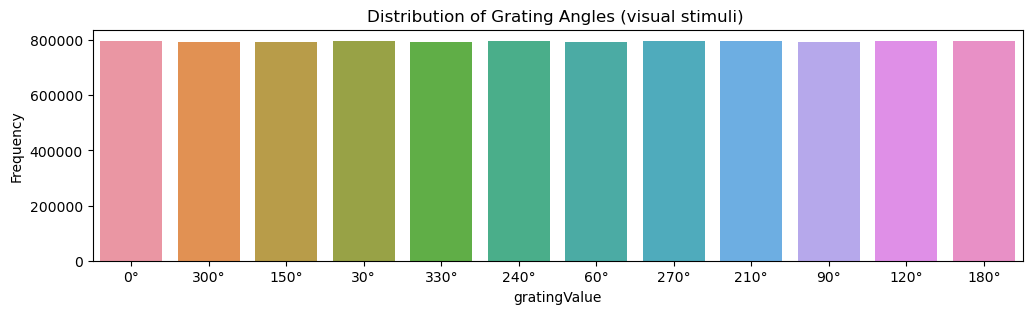

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el diccionario de mapeo
mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}

# Mapear los valores en merged_df
merged_df['gratingValue'] = merged_df['gratingID'].map(mapping)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 3))

# Utilizar countplot para crear el gráfico
sns.countplot(data=merged_df[merged_df['gratingValue']!='NaN'], x='gratingValue')

# Agregar etiquetas y título
plt.ylabel('Frequency')
plt.title('Distribution of Grating Angles (visual stimuli) ')

# Mostrar el gráfico
plt.show()

In [55]:
sns.pairplot(merged_df[['dff'], hue='gratingValue')

SyntaxError: invalid syntax (2004065845.py, line 1)

KeyboardInterrupt: 

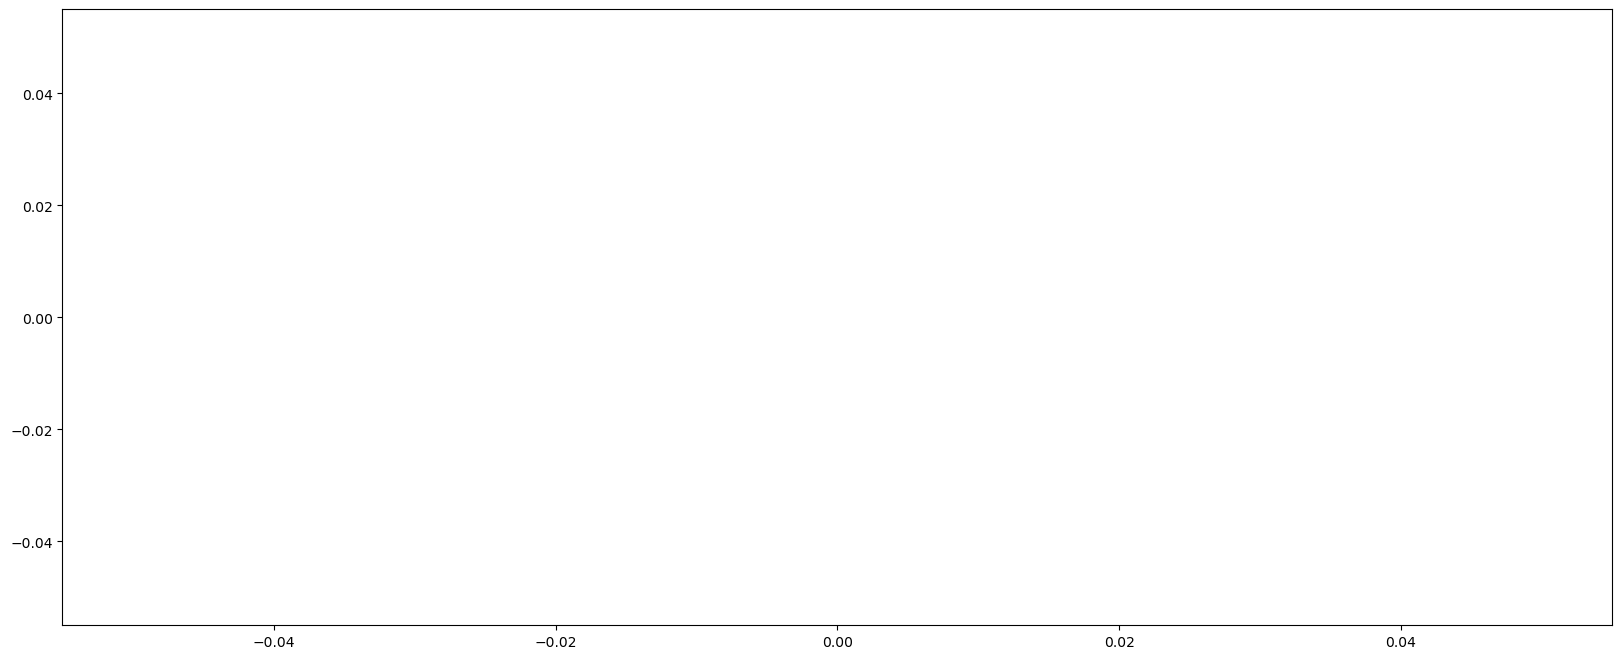

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(20,8))


# Crear el gráfico de líneas con Seaborn
sns.lineplot(x='gratingID', y='dff', data=merged_df, marker='o')

# Mostrar el gráfico
plt.show()


# 0°

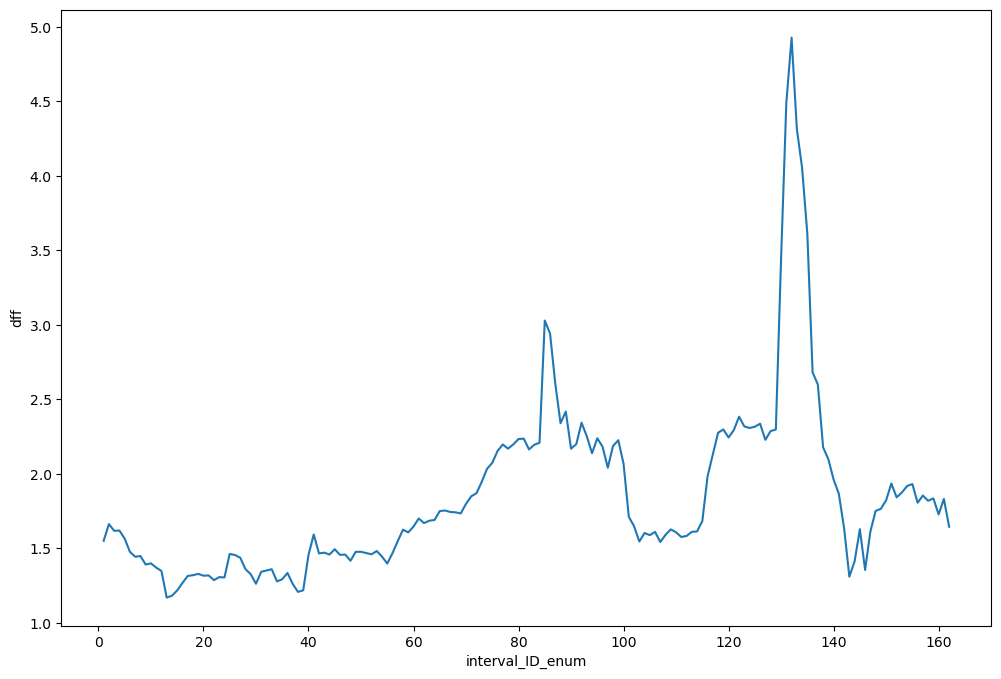

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(12,8))

# Crear el gráfico de líneas con Seaborn
sns.lineplot(x='interval_ID_enum', y='dff', data=merged_df[merged_df['gratingID']==1],ci=None)
#plt.ylim(0.8,1.5)
# Mostrar el gráfico
plt.show()

# 90°

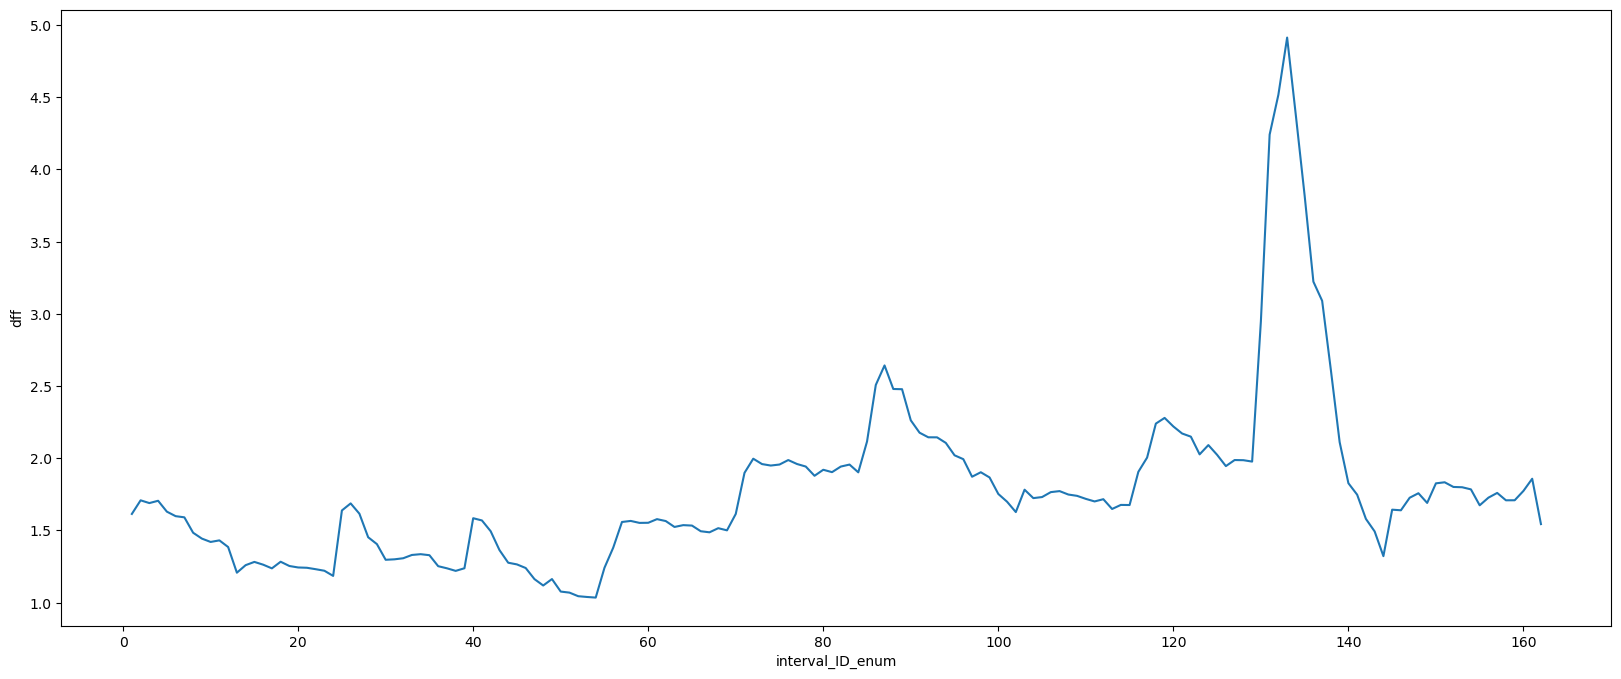

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(20,8))

# Crear el gráfico de líneas con Seaborn
sns.lineplot(x='interval_ID_enum', y='dff', data=merged_df[merged_df['gratingID']==4],ci=None)
#plt.ylim(0.8,1.5)
# Mostrar el gráfico
plt.show()

# 180°

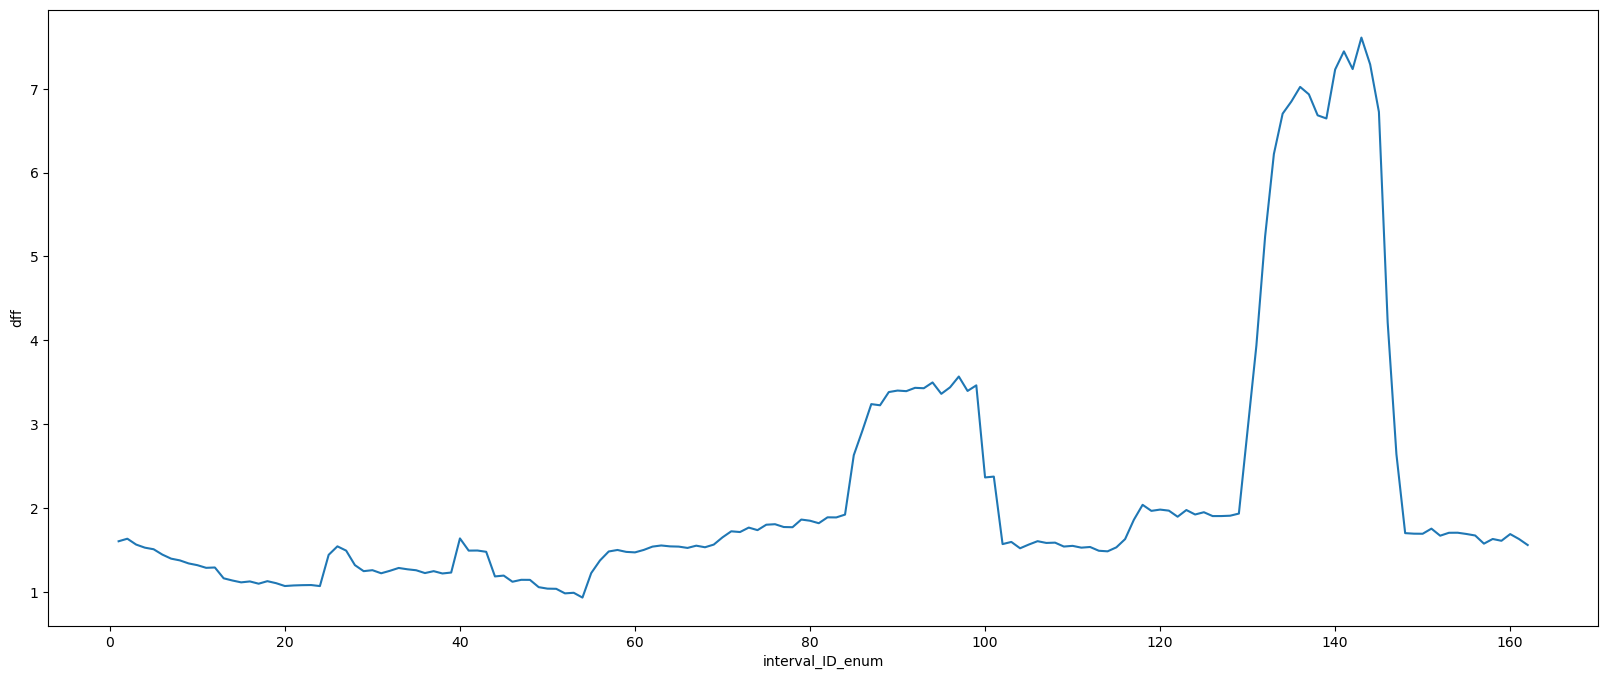

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(20,8))

# Crear el gráfico de líneas con Seaborn
sns.lineplot(x='interval_ID_enum', y='dff', data=merged_df[merged_df['gratingID']==7],ci=None)
#plt.ylim(0.8,1.5)
# Mostrar el gráfico
plt.show()

# 270°

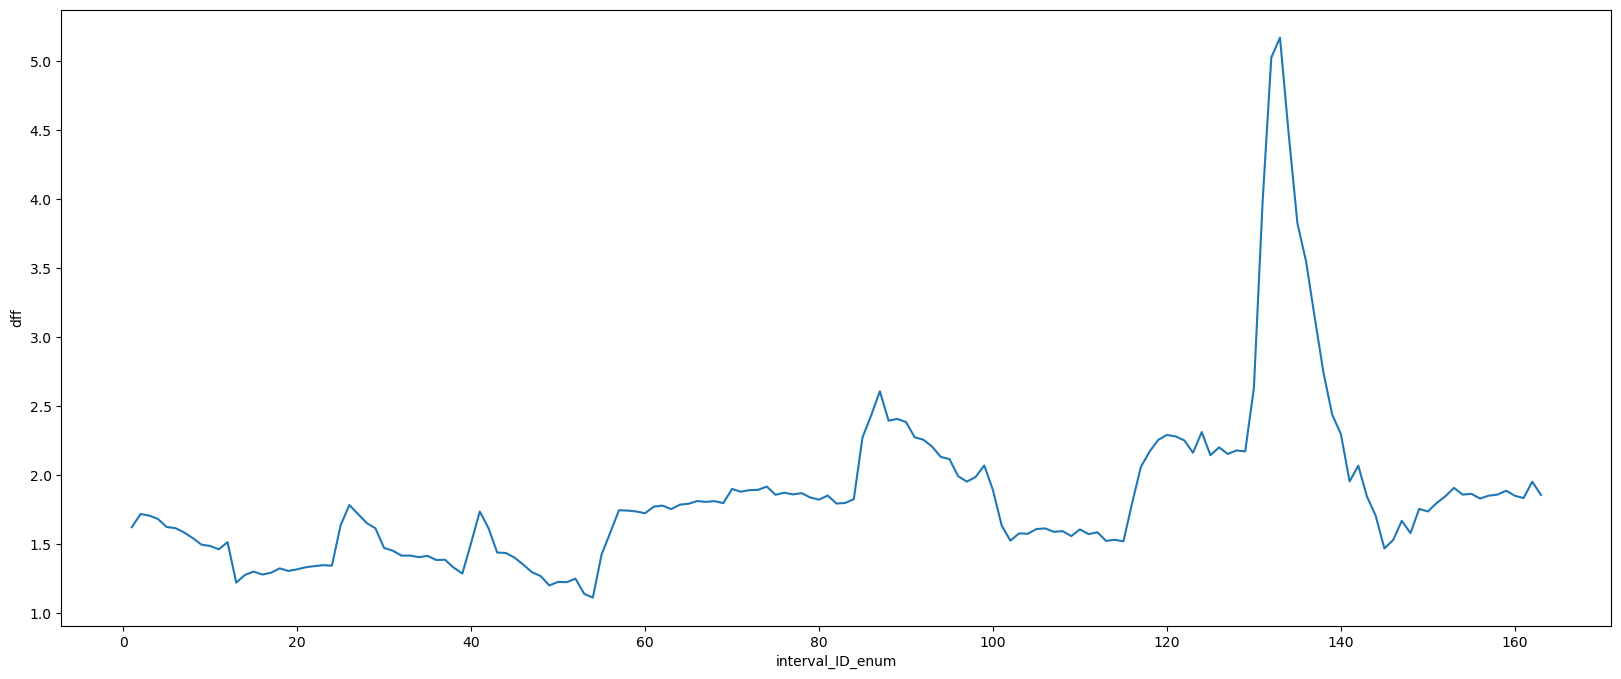

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(20,8))

# Crear el gráfico de líneas con Seaborn
sns.lineplot(x='interval_ID_enum', y='dff', data=merged_df[merged_df['gratingID']==10],ci=None)
#plt.ylim(0.8,1.5)

# Mostrar el gráfico
plt.show()

In [ ]:
# Convertir la columna de tiempo a tipo datetime
df_merged['timestamps'] = pd.to_datetime(data['timestamps'])

# Eliminar filas con valores NaN en las columnas relevantes
data_cleaned = df_merged.dropna(subset=['dff', 'timestamps', 'gratingID'])


# Calcular el promedio de los valores para cada clase
promedios_clases = data_cleaned.groupby('gratingID')['dff'].mean()

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")

# Crear un gráfico de línea para cada clase
for clase, promedio in promedios_clases.items():
    clase_data = data[data['gratingID'] == clase]
    
    # Graficar los valores para la clase
    sns.lineplot(x='timestamps', y='dff', data=clase_data, label='Valores')
    
    # Agregar una línea horizontal para el promedio de la clase
    plt.axhline(promedio, color='r', linestyle='--', label='Promedio')
    
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()